# An Analysis of Baltimore Towing Trends
## IST 5520: Data Science w/ Python 
### By: Noah Donnelly, Nana Amoah, Quintin Sargent, Ethan Hisle, Joseph Rae 
#### December 1, 2021



# 1) Introduction

Scenario: Over the past 12 years in Baltimore there were more than 265,000 instances of towed vehicles. Baltimore kept detailed records including the vehicle make, model, the tow contractor, the location of the vehicle at the time of the tow, the price of the tow, and where the vehicle was stored. Suppose that the City of Baltimore is performing an audit to ensure that their towing practices are unbiased. They are interested in determining if they are unfairly favoring one towing company, if they are unfairly towing specific models and makes of cars, or tow cars from other states more often than others. They hired us, a data science contractor to analyze their data and present the outcome as a neutral party.

Some questions that could be analysed for checking if the city of Baltimore has been biased in towing are:
 - Is the city of Balitmore unfairly favoring one towing company over the other compeititors?
 - Is the city of Balitmore towing specific types of vehicles more than others?
 - Is the city of Balitmore towing visiting and traveling vistiors disportionally to local residents?
 - Can we predict if a car will be auctioned based on different attributes in the data set?
 
 Articles and Reports related to bias and corruption problems within the city of Baltimore:
 - https://foxbaltimore.com/news/local/ig-report-city-towing-contractor-sold-towed-vehicles
 - https://foxbaltimore.com/news/local/in-depth-maryland-leaders-and-corruption
 - https://www.baltimoresun.com/latest/bs-md-ci-officer-guilty-20111208-story.html
 - https://www.baltimoresun.com/maryland/bs-md-towing-history-20110223-story.html

The dataset has met all of the criteria required for the project, as the dataset:
 - It has 39 columns and 265,816 rows so it is large enough to analyze using data science techniques. 
 - The data is not clean. This dataset contains many missing values and the time data will need to be reformatted for ease of   analysis along with many other adjustments. 
 - As far as we have been able to discover, the dataset has not been analyzed by anyone on the internet. The dataset appears to be untouched (this could possibly be due to its restricted access). 

## 1.2) Variables we will use in the analysis

- TowedDateTime (Date, The date and time the car was towed.)
- PickupType (String, The reason the car was towed.)
- VehicleType (String, The type of the car.) 
- VehicleYear (String, The year of the car.)
- VehicleMake (String, The manufacturer of the car.)
- VehicleModel (String, The model of the car.)
- VehicleColor (String, The color of the car.)
- TagState (String, The state the car was registered in.)
- TowCompany (String, The compmany contracted to tow the car.)
- TowCharge (Double, The amount charged by the tower to tow the car.)
- TowedFromLocation (String, Where the car was when it was towed.)
- ReceivingDateTime (Date, The date and time the car was received at the yard.)
- StorageYard (String, The storage yard the car was towed to.)
- StorageLocation (String, The location of the storage yard.)
- HoldDateTime (Date, The date and time the car began to be held.)
- HoldReleasedDateTime (Date, The date and time the car was released.)
- HoldReleasedNotifyDate (Date, The date and time they notify the owner.)
- RemovedFromYardDate (Date, the date and time the car was removed from the yard.) 
- Status (String, The status of the car (released, auctioned, etc.)
- ReleaseDateTime (Date, The date and time the car was released.)
- ReleaseType (String, How the car was picked up/realeased.)
- TotalPaid (Double, The amount of money paid.)

# 2) Data Source and Collection

Data Source and Collection
The dataset is downloadable as a csv file (currently the api is not working, or may require special authorization to download,so we may have to use a web scraper to get the data).
The data sources are: 

 - [ArcGIS Table](https://data.baltimorecity.gov/datasets/93884de333ae43118871ca47624eb31c/explore)
 - [Table Description](https://catalog.data.gov/dataset/towing-3d0dc)
 - [Raw Data](https://www.arcgis.com/home/item.html?id=93884de333ae43118871ca47624eb31c&sublayer=0&sortOrder=desc&sortField=defaultFSOrder#data)


# Data Manipulation

In [1]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Towing.csv',sep = ',')
df.sample(3).transpose()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,7,15,17,18,20,26,27,28,29,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,95403,219907,40231
PropertyNumber,P235724,P360308,F607329
TowedDateTime,2012/04/13 13:53:00+00,2018/04/21 22:12:00+00,2016/12/16 16:18:00+00
PickupType,Accident (Owner/Operator Hospitalized),Stolen Recovered,Parking Violation
VehicleType,Van,Pick-up Truck,NaN
VehicleYear,05,10,NaN
VehicleMake,Chrysler,Ford,FORD
VehicleModel,NaN,F-150,NaN
VehicleColor,Blue,Black,NaN
TagNumber,9AD1487,WES9559,VLB9518
TagState,MD,VA,VA


These columns were not very usefull mostly due to the high number of null variables so we dropped them.

In [3]:
dfDropped = df.drop(['TRDateTime','PersonalPropRemoved',
                     'PersonalPropLeftInVehicle','HoldType','ESRI_OID'], axis = 1)
dfDropped.sample(3).transpose()

,30706,9722,70409
PropertyNumber,F506797,F307890,P210710
TowedDateTime,2015/10/09 07:55:00+00,2013/10/24 16:20:00+00,2011/01/11 05:10:00+00
PickupType,Parking Violation,Parking Violation,Police Action (Narcotic)
VehicleType,NaN,NaN,Car
VehicleYear,14,NaN,99
VehicleMake,HONDA,MERCURY,Honda
VehicleModel,ACCORD,NaN,Civic
VehicleColor,NaN,NaN,Silver
TagNumber,9BL1387,KAL035,7DRB91
TagState,MD,MD,MD


## Changing column types

change year to numeric

In [4]:
dfDropped["VehicleYear"] = pd.to_numeric(df["VehicleYear"].str.replace("[^0-9.]",""))
def custom_year(year):
    if pd.isna(year):
        return np.nan
    if year <10:
        return 2021 - float("200"+str(year))
    if year<=21:
        return 2021 - float("20"+str(year))
    if year>=21 and year<=1900:
        return 2021 - float("19"+str(year))
    else:
        return 2021 - float(year)
        
dfDropped['VehicleAge'] = dfDropped.apply(lambda x: custom_year(x['VehicleYear']),axis=1)

In [5]:
dfDropped.sample(5)

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,HoldDateTime,HoldReleasedDateTime,HoldReleasedNotifyDate,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge
239727,P380139,2019/05/30 16:12:00+00,Accident,SUV,3.0,Ford,Explorer,Black,6DS3031,MD,...,NaN,NaN,NaN,2019/06/03 00:00:00+00,0.0,Released,2019/06/03 12:29:00+00,Reclaimed by Owner,235.0,18.0
110682,P251012,2013/01/16 18:48:00+00,Abandoned (Towed by City),SUV,73.0,Ford,Bronco,Blue,TBJ528,MD,...,NaN,NaN,NaN,2013/02/20 00:00:00+00,0.0,Auctioned (Not Released),2013/02/20 08:00:00+00,Auctioned,0.0,48.0
148017,P288365,2014/12/09 16:13:00+00,Accident (Owner/Operator Hospitalized),Car,4.0,Honda,Accord,White,3BM6483,MD,...,NaN,NaN,NaN,2014/12/22 00:00:00+00,0.0,Released,2014/12/22 13:56:00+00,Reclaimed by Insurer,385.0,17.0
249978,P390606,2020/02/12 22:21:00+00,Burns,SUV,NaN,Toyota,Highlander,Silver,2DG4014,MD,...,2020/02/12 22:21:00+00,2020/02/20 10:23:00+00,2020/02/20 00:00:00+00,2020/03/04 00:00:00+00,0.0,Released,2020/03/04 13:58:00+00,Reclaimed by Insurer,569.0,NaN
262119,P402992,2021/05/24 22:05:00+00,Accident,Van,NaN,Dodge,Grand Caravan,Gray,CYC2926,FL,...,NaN,NaN,NaN,NaN,0.0,Active,NaN,NaN,0.0,NaN


## Dealing With Null Values

In [6]:
#finds the total number of columns with null values
sum([True for idx,row in dfDropped.iterrows() if any(row.isnull())])

253520

Maybe dropping columns with a lot of NaNs will help.

In [7]:
dfDropped = dfDropped.drop(["HoldDateTime","HoldReleasedDateTime","HoldReleasedNotifyDate"],axis=1)

For less important catigorical variables a unknown type could be added.

In [8]:
def addUnknown(thing):
    if pd.isna(thing):
        return "Unknown"
    else:
        return thing
toChange = ["PickupType","VehicleType","VehicleMake","VehicleModel","VehicleColor","Status","ReleaseType"]
for col in toChange:
    dfDropped[col] = dfDropped.apply(lambda x: addUnknown(x[col]),axis=1)

In [9]:
dfDropped.sample(2)

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,StorageLocation,StorageTelephone,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge
102317,P242643,2012/08/15 11:12:00+00,Stolen Recovered,Van,98.0,Plymouth,Voyager,Purple,4AM8558,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2012/08/16 00:00:00+00,1.0,Released,2012/08/16 14:13:00+00,Reclaimed by Owner,130.0,23.0
200071,P340465,2017/05/24 12:02:00+00,Accident,Car,NaN,Toyota,Solara,Black,9CR2107,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2017/06/03 00:00:00+00,0.0,Released,2017/06/03 12:53:00+00,Reclaimed by Insurer,340.0,NaN


In [10]:
#sum([True for idx,row in dfDropped.iterrows() if any(row.isnull())])

Drop The remaining rows with NaN

In [11]:
dfDropped = dfDropped.dropna()

In [12]:
dfDropped.sample(10)

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,StorageLocation,StorageTelephone,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge
243541,P383962,2019/09/16 13:10:00+00,Police Action (Victim of Crime),Car,9.0,Honda,Accord,Gray,4DH7028,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2019/09/20 00:00:00+00,0.0,Released,2019/09/20 09:59:00+00,Reclaimed by Owner,250.0,12.0
245665,P386289,2019/11/06 13:10:00+00,Abandoned (Towed by City),Car,95.0,Ford,Escort,Green,9863Z7,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2020/01/29 00:00:00+00,0.0,Auctioned,2020/01/29 08:00:00+00,Auctioned,0.0,26.0
192047,P332439,2017/01/05 10:09:00+00,Police Action (Misc.),Pick-up Truck,1.0,Ford,Ranger,Gold,9BW0372,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2017/04/12 00:00:00+00,0.0,Auctioned,2017/04/12 08:00:00+00,Auctioned,0.0,20.0
112438,P252768,2013/02/18 08:43:00+00,Burns,Pick-up Truck,5.0,Chevrolet,Colorado,White,3AD5209,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2013/07/22 00:00:00+00,0.0,Released,2013/07/22 11:17:00+00,Reclaimed by Insurer,510.0,16.0
132829,P273171,2014/03/07 14:02:00+00,Scofflaw,Pick-up Truck,98.0,Dodge,RAM 1500,Green,3AY3725,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2014/03/08 00:00:00+00,0.0,Released,2014/03/08 15:20:00+00,Reclaimed by Owner,518.0,23.0
192434,P332826,2017/01/11 09:00:00+00,Impound (Illegal Parking),SUV,5.0,Cadillac,Escalade,Black,4CG6398,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2017/02/03 00:00:00+00,0.0,Released,2017/02/03 16:32:00+00,Reclaimed by Insurer,602.0,16.0
127463,P267801,2013/11/20 11:06:00+00,Police Action (Arrest of Operator),Car,8.0,Toyota,Scion,Blue,36165CC,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2013/11/23 00:00:00+00,0.0,Released,2013/11/23 15:09:00+00,Reclaimed by Owner,250.0,13.0
95148,P235468,2012/04/08 00:00:00+00,Police Action (Misc.),Car,2.0,Mercedes,C230,Silver,T415192,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2012/04/09 00:00:00+00,0.0,Released,2012/04/09 13:35:00+00,Reclaimed by Owner,230.0,19.0
110740,P251070,2013/01/17 17:40:00+00,Police Action (Misc.),Car,99.0,Acura,Tl,Blue,79450CE,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2013/01/18 00:00:00+00,0.0,Released,2013/01/18 16:13:00+00,Reclaimed by Owner,220.0,22.0
76386,P216691,2011/05/01 16:19:00+00,Accident,Car,2.0,Mitsubushi,Galant,Black,2CYX23,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2011/05/04 00:00:00+00,0.0,Released,2011/05/04 10:44:00+00,Reclaimed by Insurer,245.0,19.0


## Dealing With Time

In [13]:
from datetime import datetime, timedelta

In [14]:
dfDropped["ReceivingDateTime"] = pd.to_datetime(dfDropped["ReceivingDateTime"], format='%Y/%m/%d %H:%M')
dfDropped["ReleaseDateTime"] = pd.to_datetime(dfDropped["ReleaseDateTime"], format='%Y/%m/%d %H:%M')

In [15]:
dfDropped["ReceivingDateTime"].mean()
dfDropped["ReleaseDateTime"].mean()

Timestamp('2014-02-25 19:53:00.106125568+0000', tz='UTC')

In [16]:
#Calculate The Amount of Time from Tow to Release:
dfDropped["ReceivedToRelease"] = dfDropped["ReleaseDateTime"]-dfDropped["ReceivingDateTime"]
dfDropped["ReceivedToRelease"].mean()

Timedelta('29 days 05:04:11.337517')

In [17]:
def calculate_days(time):
    if time.days >= 0:
        return time.days
    else:
        return 0

dfDropped['DaysTillReleased'] = dfDropped['ReceivedToRelease'].apply(lambda x: calculate_days(x))

## Detecting Outliers

In [18]:
dfDropped.describe()

,VehicleYear,TowCharge,TitleRenounciation,StolenVehicleFlag,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
count,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690,122690.000000
mean,29.802967,137.288849,0.004988,0.163159,284.452843,17.925373,29 days 05:04:11.337517,28.716024
std,40.108429,400.711692,0.070451,0.369512,272.789797,6.049497,102 days 07:26:34.652642,101.754406
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3593 days +21:45:00,0.000000
25%,3.000000,130.000000,0.000000,0.000000,140.000000,14.000000,1 days 16:15:00,1.000000
50%,7.000000,130.000000,0.000000,0.000000,235.000000,18.000000,4 days 17:04:00,4.000000
75%,90.000000,130.000000,0.000000,0.000000,326.000000,22.000000,21 days 00:00:30,20.750000
max,99.000000,140000.000000,1.000000,1.000000,6794.000000,94.000000,3063 days 23:08:00,3063.000000


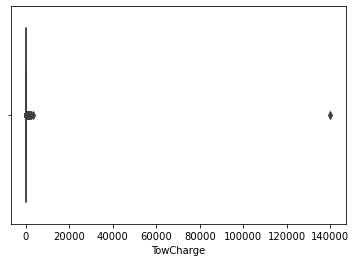

In [19]:
#Detecting outliers among the TowCharge column

boxplot1 = sns.boxplot(x=dfDropped["TowCharge"])

In [20]:
# Calculate the first quantile
first_quantile = dfDropped['TowCharge'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['TowCharge'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
TowChargeOut = pd.concat([dfDropped[dfDropped['TowCharge']<first_quantile-1.5*IQR],
dfDropped[dfDropped['TowCharge']>third_quantile+1.5*IQR]])

print(len(TowChargeOut))
TowChargeOut.sample(5)

28704


,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
89297,P229614,2011/12/20 00:53:00+00,Police Action (Misc.),Car,92.0,Lincoln,Town Car,Brown,2FDR56,MD,...,0.0,2011/12/29 00:00:00+00,0.0,Released,2011-12-29 13:02:00+00:00,Reclaimed by Owner,350.0,29.0,9 days 12:09:00,9
97601,P237923,2012/05/22 17:10:00+00,Impound (Illegal Parking),SUV,99.0,Oldsmobile,Bravada,White,APT3474,AR,...,0.0,2012/06/02 00:00:00+00,0.0,Released,2012-06-02 13:15:00+00:00,Reclaimed by Owner,417.0,22.0,10 days 20:05:00,10
78668,P218974,2011/06/10 19:22:00+00,Stolen Recovered,Van,1.0,Dodge,Caravan,Green,M686267,MD,...,0.0,2011/06/15 00:00:00+00,1.0,Released,2011-06-15 10:56:00+00:00,Reclaimed by Insurer,140.0,20.0,4 days 15:34:00,4
144146,P284493,2014/09/28 21:25:00+00,Stolen Recovered,Car,7.0,Ford,500,Green,1AS7120,MD,...,0.0,2014/10/01 00:00:00+00,1.0,Released,2014-10-01 14:24:00+00:00,Reclaimed by Owner,205.0,14.0,2 days 16:59:00,2
92899,P233217,2012/02/28 12:20:00+00,Police Action (Narcotic),Car,90.0,Toyota,Corolla,Burgundy,GLF137,MD,...,0.0,2012/05/01 00:00:00+00,0.0,Released,2012-05-01 13:56:00+00:00,Reclaimed by Owner,230.0,31.0,63 days 01:36:00,63


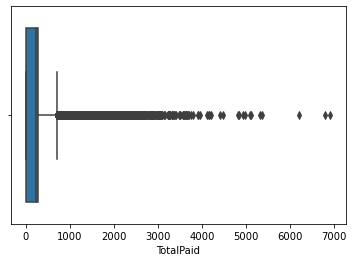

In [21]:
#Detecting outliers among the TotalPaid column
boxplot2 = sns.boxplot(x=df["TotalPaid"])

In [22]:
# Calculate the first quantile
first_quantile = dfDropped['TotalPaid'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['TotalPaid'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
TotalPaidOut = pd.concat([dfDropped[dfDropped['TotalPaid']<first_quantile-1.5*IQR],
dfDropped[dfDropped['TotalPaid']>third_quantile+1.5*IQR]])

print(len(TotalPaidOut))
TotalPaidOut.sample(5)

10729


,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
171818,P312187,2016/02/10 14:54:00+00,Scofflaw,SUV,6.0,Jeep,Cherokee,Black,M433583,MD,...,0.0,2016/02/19 00:00:00+00,0.0,Released,2016-02-19 16:29:00+00:00,Reclaimed by Owner,756.0,15.0,9 days 01:35:00,9
124339,P264675,2013/09/23 21:53:00+00,Accident (Death of Operator),SUV,8.0,Toyota,RAV4,Silver,50119M5,MD,...,0.0,2013/11/13 00:00:00+00,0.0,Released,2013-11-13 10:23:00+00:00,Reclaimed by Insurer,955.0,13.0,50 days 12:30:00,50
136146,P276488,2014/05/06 11:48:00+00,Abandoned (Towed by City),SUV,6.0,Hyundai,Tucson,Black,2BA3631,MD,...,0.0,2014/05/19 00:00:00+00,0.0,Released,2014-05-19 08:48:00+00:00,Reclaimed by Lien Holder,687.0,15.0,12 days 21:00:00,12
142813,P283159,2014/09/04 01:07:00+00,Police Action (Arrest of Operator),Car,3.0,Cadillac,Deville,Gray,A266653,MD,...,0.0,2014/10/04 00:00:00+00,0.0,Released,2014-10-04 15:15:00+00:00,Reclaimed by Owner,655.0,18.0,30 days 14:08:00,30
140923,P281269,2014/07/31 10:16:00+00,Scofflaw,Car,2.0,Nissan,Sentra,Silver,6FXG11,MD,...,0.0,2014/07/31 00:00:00+00,0.0,Released,2014-07-31 16:11:00+00:00,Reclaimed by Owner,2324.0,19.0,0 days 05:55:00,0


Find outliers in year

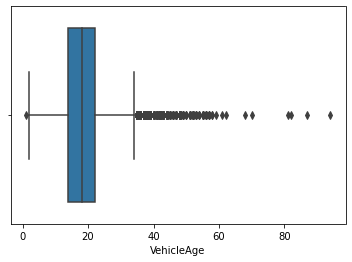

In [27]:
boxplot2 = sns.boxplot(x= dfDropped["VehicleAge"])

In [28]:
# Calculate the first quantile
first_quantile = dfDropped['VehicleAge'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['VehicleAge'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
YearOut = pd.concat([dfDropped[dfDropped['VehicleAge']<first_quantile-1.5*IQR],
dfDropped[dfDropped['VehicleAge']>third_quantile+1.5*IQR]])

print(len(YearOut))

752


Since we would lose so much data if we dropped all the outliers we chose not to drop all the outliers.

In [29]:
dfNew = dfDropped

In [30]:
#dfNew = dfDropped.drop(TowChargeOut.index, errors='ignore')
#dfNew = dfNew.drop(TotalPaidOut.index, errors='ignore')
#dfNew = dfNew.drop(YearOut.index, errors='ignore')

In [31]:
dfNew.sample(5)

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
241703,P382121,2019/07/25 12:21:00+00,Abandoned (Towed by City),Pick-up Truck,90.0,Ford,F150,Green,492672,MD,...,0.0,2020/02/12 00:00:00+00,0.0,Auctioned,2020-02-12 08:00:00+00:00,Auctioned,0.0,31.0,201 days 19:39:00,201
145829,P286176,2014/10/29 03:14:00+00,Police Action (Arrest of Operator),Van,98.0,Ford,Windstar,Silver,HYB348,MS,...,0.0,2015/01/07 00:00:00+00,0.0,Auctioned (Not Released),2015-01-07 08:00:00+00:00,Auctioned,0.0,23.0,70 days 04:46:00,70
79119,P219425,2011/06/18 09:14:00+00,Accident (Owner/Operator Hospitalized),Car,8.0,Ford,Taurus,Black,5AG0318,MD,...,0.0,2011/06/23 00:00:00+00,0.0,Released,2011-06-23 09:44:00+00:00,Reclaimed by Insurer,275.0,13.0,5 days 00:30:00,5
167575,P307930,2015/11/25 23:40:00+00,Accident,Car,5.0,Ford,Taurus,Silver,1BM3546,MD,...,0.0,2015/11/27 00:00:00+00,0.0,Released,2015-11-27 11:29:00+00:00,Reclaimed by Owner,220.0,16.0,1 days 11:49:00,1
53859,P194151,2010/03/15 13:17:00+00,Accident,Car,5.0,Dodge,Magnum,Gray,06118CC,MD,...,0.0,2010/03/18 00:00:00+00,0.0,Released,2010-03-18 08:47:00+00:00,Reclaimed by Insurer,245.0,16.0,2 days 19:30:00,2


In [32]:
dfNew.describe()

,VehicleYear,TowCharge,TitleRenounciation,StolenVehicleFlag,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
count,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690,122690.000000
mean,29.802967,137.288849,0.004988,0.163159,284.452843,17.925373,29 days 05:04:11.337517,28.716024
std,40.108429,400.711692,0.070451,0.369512,272.789797,6.049497,102 days 07:26:34.652642,101.754406
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3593 days +21:45:00,0.000000
25%,3.000000,130.000000,0.000000,0.000000,140.000000,14.000000,1 days 16:15:00,1.000000
50%,7.000000,130.000000,0.000000,0.000000,235.000000,18.000000,4 days 17:04:00,4.000000
75%,90.000000,130.000000,0.000000,0.000000,326.000000,22.000000,21 days 00:00:30,20.750000
max,99.000000,140000.000000,1.000000,1.000000,6794.000000,94.000000,3063 days 23:08:00,3063.000000


## Data Exploration

In [33]:
sns.set(rc = {'figure.figsize':(15,8)})

### Is the city of Balitmore unfairly favoring one towing company over the other compeititors?

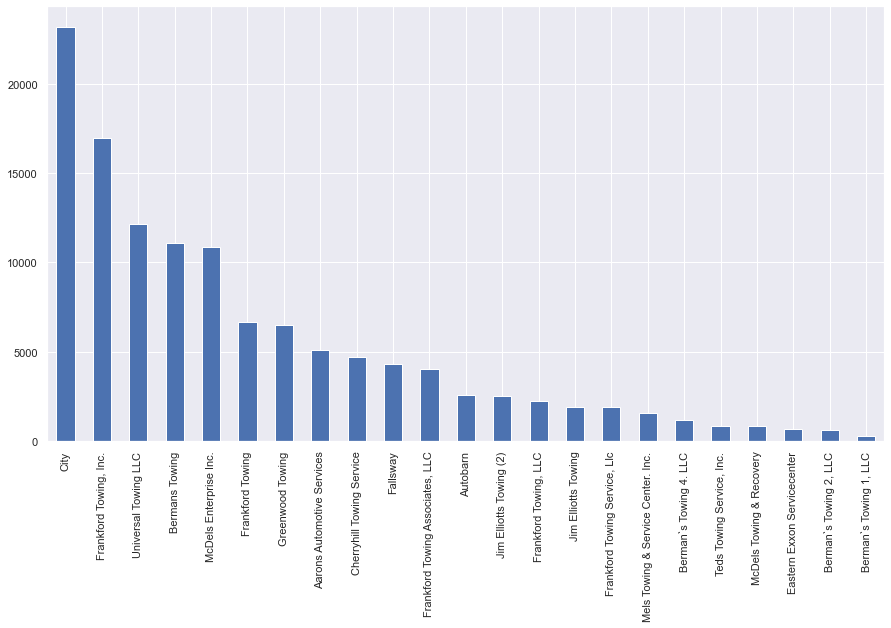

In [34]:
dfNew['TowCompany'].value_counts().plot(kind='bar')

It looks like there is more than 1 entry for each of the different towing companies. These should be combined together.

In [35]:
dfNew['TowCompany'] = dfNew['TowCompany'].str.replace('\s([\s\S]*)$', '')
dfNew['TowCompany'] = dfNew['TowCompany'].str.replace('[^a-zA-Z\d\s:]', '')

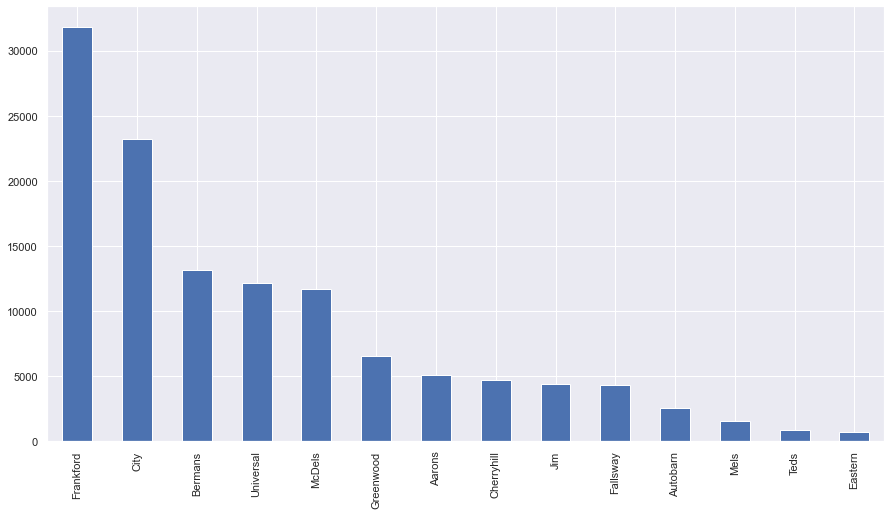

In [36]:
dfNew['TowCompany'].value_counts().plot(kind='bar')

Frankford is the most popular towing company followed by the city and Bermans.

### Is the city of Balitmore towing specific types of vehicles more than others? Are different types of vehicles charged different amounts?

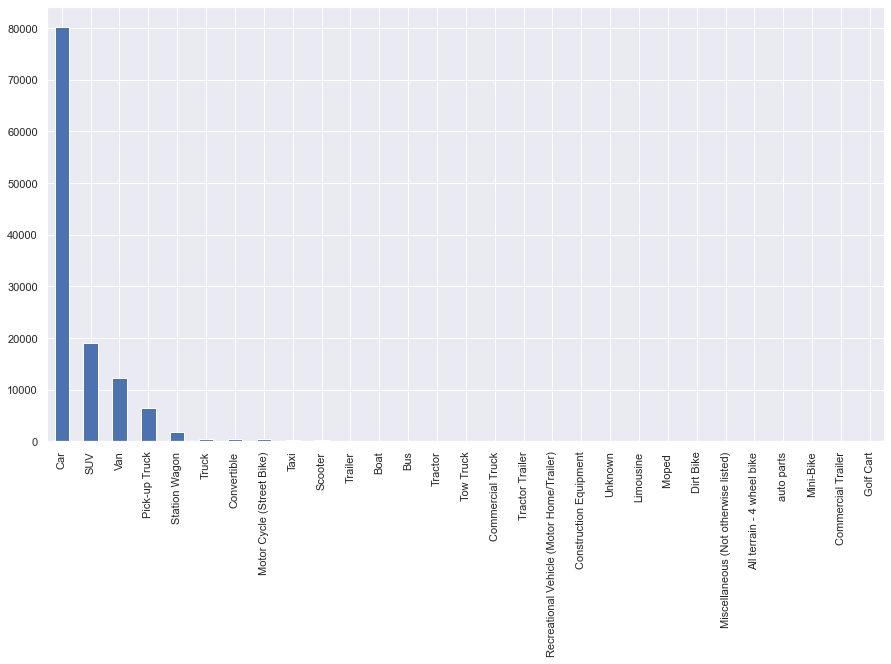

In [37]:
dfNew['VehicleType'].value_counts().plot(kind='bar')

As expected the most popular types of vehicles are towed the most.

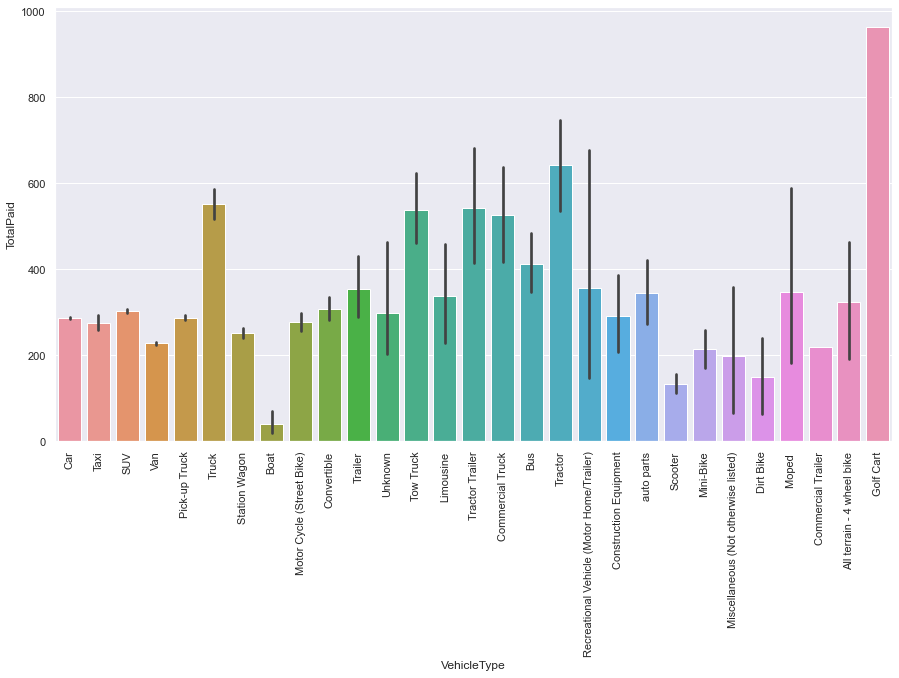

In [38]:
ax = sns.barplot(x="VehicleType", y="TotalPaid", data=dfNew)
ax.tick_params(axis='x', rotation=90)


It seems that smaller vehicles like dirt bikes and scooters have the lowest tow charge and some of the biggest vehicles such as tractors and trucks have the highest tow charge.

### Is the city of Balitmore towing visiting and traveling vistiors disportionally to local residents?

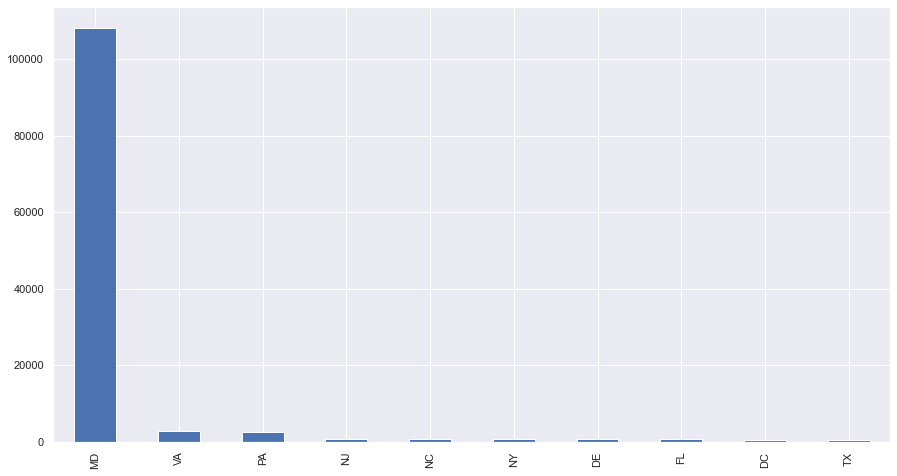

In [39]:
#Graph of the top 10 states vehicles are towed from
dfNew['TagState'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

Most of the vehicles towed are from Maryland folowed by Virgia and Pennsylvania which are adjacent states. 

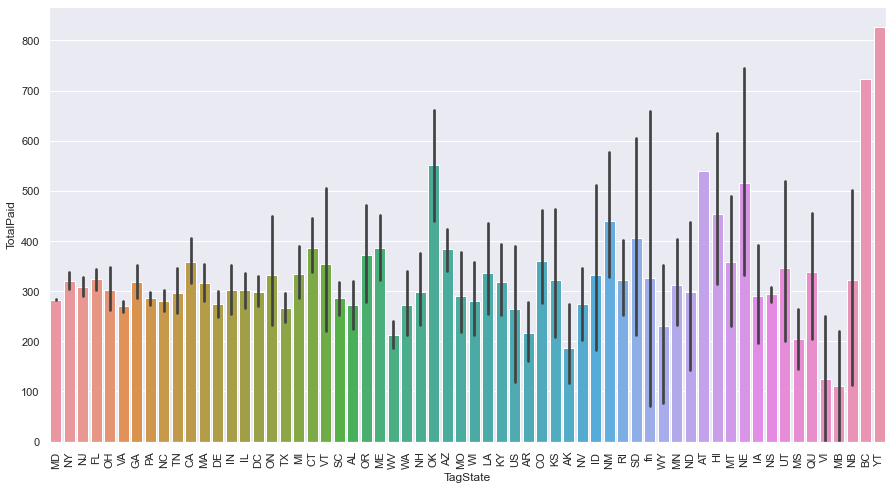

In [40]:
ax = sns.barplot(x="TagState", y="TotalPaid", data=dfNew)
ax.tick_params(axis='x', rotation=90)

### Other Graphs

Text(0.5, 0, 'Age')

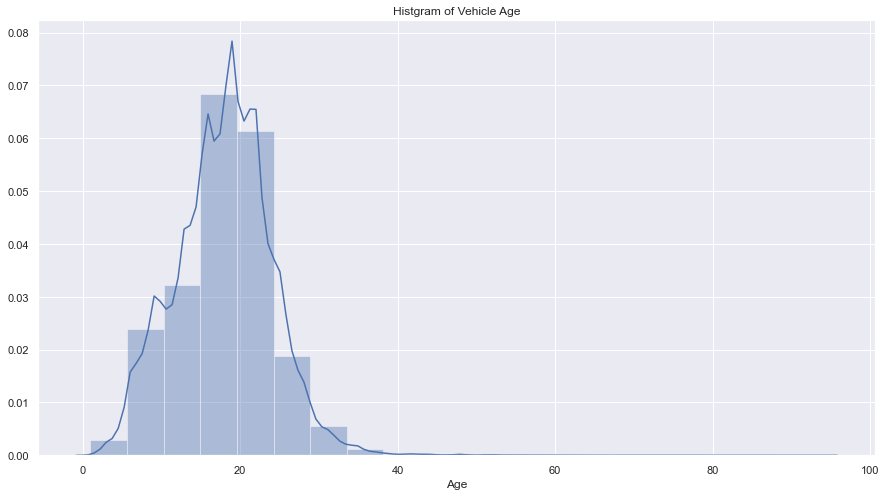

In [41]:
ax = sns.distplot(dfNew['VehicleAge'], bins=20)
ax.set_title('Histgram of Vehicle Age')
ax.set_xlabel('Age')

It seems like most cars towed are around 20 years old but some are much older. Probably antique cars.

Text(0.5, 0, 'Cost')

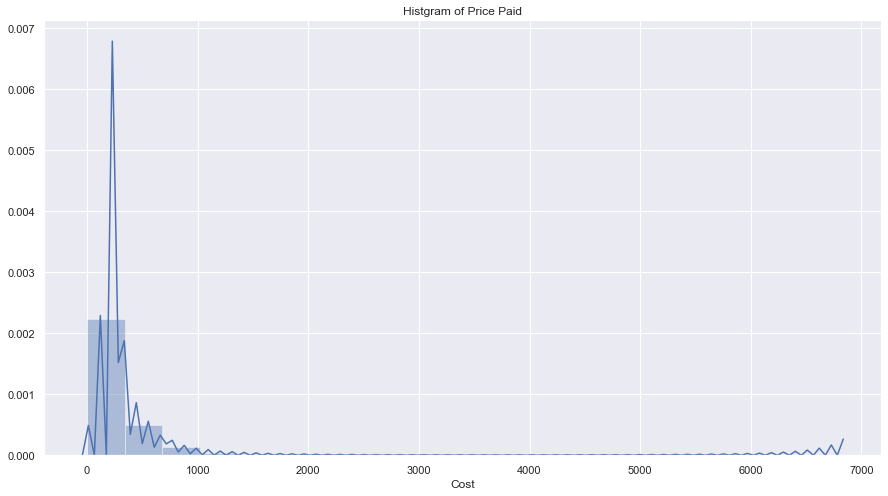

In [42]:
ax = sns.distplot(dfNew['TotalPaid'],bins=20)
ax.set_title('Histgram of Price Paid')
ax.set_xlabel('Cost')

It looks like there are 3 common prices and then some less common amounts afterwords.

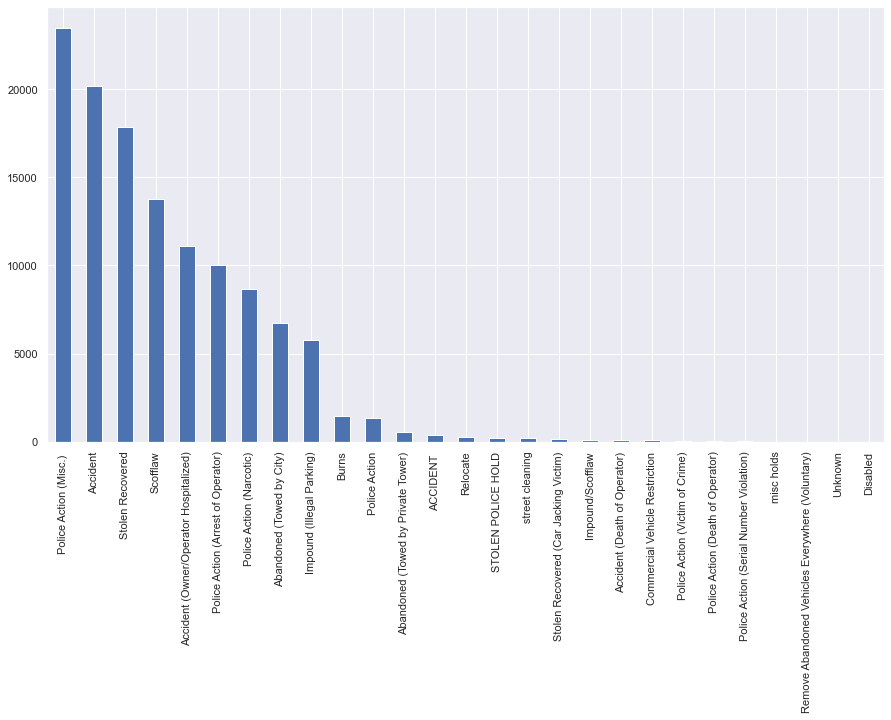

In [43]:
dfNew['PickupType'].value_counts().plot(kind='bar')

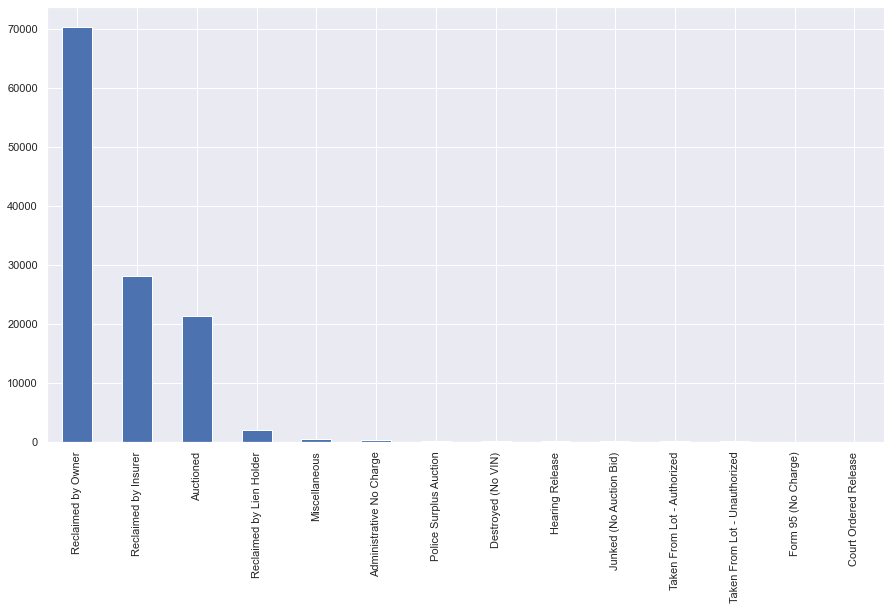

In [44]:
dfNew['ReleaseType'].value_counts().plot(kind='bar')

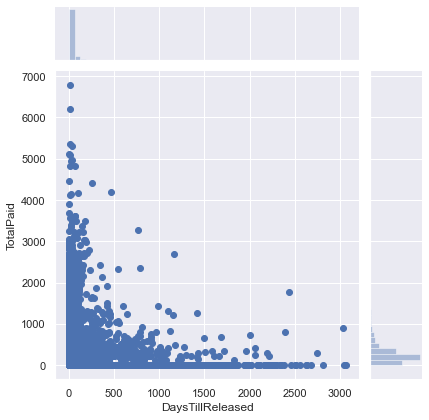

In [45]:
# Use seaborn to draw scatterplot
ax = sns.jointplot(x="DaysTillReleased", y="TotalPaid", data=dfNew[['DaysTillReleased','TotalPaid']])
#ax.set_axis_labels('% lower status of the population','house price')

It does not seem like there is a correlation between days till released and the total paid

### Can we predict if a car will be auctioned based on different attributes in the data set?